# <H1 align=center>Crimes in Chicago </H1>

L'obiettivo del notebook è quello di eseguire delle analisi esplorative sui crimini commessi a Chicago in un orizzonte temporale di 10 anni e di predirre il numero di crimini negli anni successivi.<br> Inizialmente avevo scelto di analizzare i crimini dal 2007 al 2017, ma, come si vedrà di seguito, al momento dell'importazione dei csv mi sono accorta che per l'anno 2017 i dati non erano completi, pertanto ho preferito escluderli e considerare un nuovo orizzonte temporale: **dal 2006 al 2016**. 

Dati utilizzati sono open source e sono stati scaricati da Kaggle al seguente link https://www.kaggle.com/currie32/crimes-in-chicago 

## Indice

[Importazione librerie e set up costanti](#library)<a href='#library'></a> <br>
[Importazione dei dati](#import)<a href='#import'></a> <br>
[Analisi Esplorative](#explore)<a href='#explore'></a> <br>
[Machine Learning](#ml)<a href='#ml'></a> <br>

<a id='library'></a>
### Importazione librerie e set up costanti 

Iniziamo importando le librerie python che verrano utilizzate all'interno del documento 

In [15]:
#analisi EDA   
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import datetime
#import wordcloud

#from PIL import Image
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#accesso alle funzionalità del sistema operativo 
import os 

print ("Setup Complete.")

Setup Complete.


In [16]:
#codice per il reload automatico e inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Dichiariamo ora le costanti.

In [17]:
BASEPATH = os.path.abspath('')

DATASET1 = 'Chicago_Crimes_2005_to_2007.csv'
DATASET2 = 'Chicago_Crimes_2008_to_2011.csv'
DATASET3 = 'Chicago_Crimes_2012_to_2017.csv'

PATH1 = os.path.join(BASEPATH,DATASET1)
PATH2 = os.path.join(BASEPATH,DATASET2)
PATH3 = os.path.join(BASEPATH,DATASET3)

print("Path 1:",PATH1)
print("Path 2:",PATH2)
print("Path 3:",PATH3)

Path 1: C:\Users\nigroch1\Documents\DATA SCIENCE COURSE\Esame_Corso_DataScience\Chicago_Crimes_2005_to_2007.csv
Path 2: C:\Users\nigroch1\Documents\DATA SCIENCE COURSE\Esame_Corso_DataScience\Chicago_Crimes_2008_to_2011.csv
Path 3: C:\Users\nigroch1\Documents\DATA SCIENCE COURSE\Esame_Corso_DataScience\Chicago_Crimes_2012_to_2017.csv


<a id='import'></a>
### Importazione dei dati

Importo i tre csv separatamente e li concateno in modo tale da creare un'unico dataframe contenente i dati dal 2006 al 2016. <br> Ho scelto di effettuo pulizia dei dati sui singoli dataframe, prima quindi di concatenarli. <br> 
[CSV relativo ai crimini commessi dal 2006 al 2007](#2006-2007)<a href='#2006-2007'></a> <br>
[CSV relativo ai crimini commessi dal 2008 al 2011](#2008-2011)<a href='#2008-2011'></a> <br>
[CSV relativo ai crimini commessi dal 2012 al 2016](#2012-2016)<a href='#2012-2016'></a> <br>

<a id='2006-2007'></a>
#### Crimini relativi agli anni 2006 - 2007 

In [18]:
#importo il csv sulle analisi dei crimini dal 2005 al 2007
Chicago_05_07 = pd.read_csv(PATH1, header=0, error_bad_lines = False)
Chicago_05_07 = Chicago_05_07.iloc[:,1:]
Chicago_05_07.head()

b'Skipping line 533719: expected 23 fields, saw 24\n'


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [19]:
print("Il dataframe 'Chicago_05_07' contiene:\n",format(Chicago_05_07.shape[0],',d'),"righe\n",Chicago_05_07.shape[1],"colonne")

Il dataframe 'Chicago_05_07' contiene:
 1,872,343 righe
 22 colonne


In [20]:
#che tipo di dari ho? 
Chicago_05_07.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

Come prima cosa, per lavorare agevolmente con il dataframe, rinomino le colonne in modo tale da eliminare lo spazio nel nome e trasformo nel formato corretto i campi contenenti una data.

In [21]:
#funzione replace
Chicago_05_07.columns=[c.replace( ' ', '_') for c in Chicago_05_07.columns]
Chicago_05_07.columns

Index(['ID', 'Case_Number', 'Date', 'Block', 'IUCR', 'Primary_Type',
       'Description', 'Location_Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community_Area', 'FBI_Code', 'X_Coordinate',
       'Y_Coordinate', 'Year', 'Updated_On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [22]:
#trasformo i campi 'Date' e 'Update_On' da object a datetime64
Chicago_05_07.Date = pd.to_datetime(Chicago_05_07.Date, format='%m/%d/%Y %I:%M:%S %p')
Chicago_05_07.Updated_On = pd.to_datetime(Chicago_05_07.Updated_On, format='%m/%d/%Y %I:%M:%S %p')
Chicago_05_07.dtypes

ID                               int64
Case_Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary_Type                    object
Description                     object
Location_Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                       float64
Ward                           float64
Community_Area                 float64
FBI_Code                        object
X_Coordinate                   float64
Y_Coordinate                   float64
Year                             int64
Updated_On              datetime64[ns]
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

##### Trattamento valori duplicati

Controllo che il dataframe non contenga righe duplicate e procedo all'analisi dei valori NaN.

In [23]:
#creo una funzione per il il controllo dei valori duplicati
def check_duplicates(df):
    x= df.duplicated().sum()
    if x>0 :
        df = df.drop_duplicates()
        print("Sono stati elinimati",x,"record.")
        print("Il dataframe ora contiene:\n",format(df.shape[0],',d'),"righe\n",df.shape[1],"colonne")
    else:
        print("Non ci sono record duplicati.")
    #return (df.head())

In [24]:
check_duplicates(Chicago_05_07)

Sono stati elinimati 533716 record.
Il dataframe ora contiene:
 1,338,627 righe
 22 colonne


##### Trattamento valori nulli 

In [25]:
#controllo numero dei valori null
Chicago_05_07.isnull().sum()

ID                         0
Case_Number                0
Date                       0
Block                      0
IUCR                       0
Primary_Type               0
Description                0
Location_Description      25
Arrest                     0
Domestic                   0
Beat                       0
District                   5
Ward                      15
Community_Area           349
FBI_Code                   0
X_Coordinate            9154
Y_Coordinate            9154
Year                       0
Updated_On                 0
Latitude                9154
Longitude               9154
Location                9154
dtype: int64

Di questo dataframe, mi servono solo i valori relativi all'anno 2007, quindi, visto che il campo Year non contiene valori nulli, eseguo la selezione del dataframe, in modo tale da valutare quanto pessano rispetto al dataframe corretto. 

In [26]:
#filtro il dataframe per year = 2007 
Chicago_05_07 = Chicago_05_07.loc[Chicago_05_07.Year >= 2006]
print("Il dataframe 'Chicago_05_07' ora contiene:\n",format(Chicago_05_07.shape[0],',d'),"righe\n",Chicago_05_07.shape[1],"colonne.")

Il dataframe 'Chicago_05_07' ora contiene:
 1,416,532 righe
 22 colonne.


In [27]:
#controllo numero dei valori null
Chicago_05_07.isnull().sum()

ID                         0
Case_Number                0
Date                       0
Block                      0
IUCR                       0
Primary_Type               0
Description                0
Location_Description      19
Arrest                     0
Domestic                   0
Beat                       0
District                   4
Ward                      14
Community_Area           295
FBI_Code                   0
X_Coordinate            3965
Y_Coordinate            3965
Year                       0
Updated_On                 0
Latitude                3965
Longitude               3965
Location                3965
dtype: int64

In [28]:
#print la percentuale di record con valori nan rispetto al totale
print("Lo", round(Chicago_05_07.Location_Description.isnull().sum()/Chicago_05_07.shape[0]*100,4),"% dei record del campo 'Location_Description' contiene valori nulli.")
print("Lo", round(Chicago_05_07.District.isnull().sum()/Chicago_05_07.shape[0]*100,4),"% dei record del campo 'District' contiene valori nulli.")
print("Lo", round(Chicago_05_07.Ward.isnull().sum()/Chicago_05_07.shape[0]*100,4),"% dei record del campo 'Ward' contiene valori nulli.")
print("Lo", round(Chicago_05_07.Community_Area.isnull().sum()/Chicago_05_07.shape[0]*100,2),"% dei record del campo 'Community_Area' contiene valori nulli.")
print("Lo", round(Chicago_05_07.X_Coordinate.isnull().sum()/Chicago_05_07.shape[0]*100,2),"% dei record del campo 'X_Coordinate' contiene valori nulli.")
print("Lo", round(Chicago_05_07.Y_Coordinate.isnull().sum()/Chicago_05_07.shape[0]*100,2),"% dei record del campo 'Y_Coordinate' contiene valori nulli.")
print("Lo", round(Chicago_05_07.Latitude.isnull().sum()/Chicago_05_07.shape[0]*100,2),"% dei record del campo 'Latitude' contiene valori nulli.")
print("Lo", round(Chicago_05_07.Longitude.isnull().sum()/Chicago_05_07.shape[0]*100,2),"% dei record del campo 'Longitude' contiene valori nulli.")
print("Lo", round(Chicago_05_07.Location.isnull().sum()/Chicago_05_07.shape[0]*100,2),"% dei record del campo 'Location' contiene valori nulli.")

Lo 0.0013 % dei record del campo 'Location_Description' contiene valori nulli.
Lo 0.0003 % dei record del campo 'District' contiene valori nulli.
Lo 0.001 % dei record del campo 'Ward' contiene valori nulli.
Lo 0.02 % dei record del campo 'Community_Area' contiene valori nulli.
Lo 0.28 % dei record del campo 'X_Coordinate' contiene valori nulli.
Lo 0.28 % dei record del campo 'Y_Coordinate' contiene valori nulli.
Lo 0.28 % dei record del campo 'Latitude' contiene valori nulli.
Lo 0.28 % dei record del campo 'Longitude' contiene valori nulli.
Lo 0.28 % dei record del campo 'Location' contiene valori nulli.


I record NaN sono tutti inferiori allo 0,5% del totale del dataframe. Decido quindi semplicemente di eliminare questi valori.

In [29]:
#elimino i valori NaN
Chicago_05_07= Chicago_05_07.dropna()
print("Il dataframe 'Chicago_05_07' ora contiene:\n",format(Chicago_05_07.shape[0],',d'),"righe\n",Chicago_05_07.shape[1],"colonne.")

Il dataframe 'Chicago_05_07' ora contiene:
 1,412,262 righe
 22 colonne.


Ora che ho pulito il mio dataframe, ordino per data descrescente e resetto l'indice

In [30]:
Chicago_05_07 = Chicago_05_07.sort_values(by=['Date']).reset_index(drop=True)
Chicago_05_07.head()

,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,...,Ward,Community_Area,FBI_Code,X_Coordinate,Y_Coordinate,Year,Updated_On,Latitude,Longitude,Location
0,4528690,HM115317,2006-01-01,061XX S RICHMOND ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,15.0,66.0,06,1157770.0,1863721.0,2006,2016-04-15 08:55:02,41.781801,-87.697123,"(41.781801401, -87.697122998)"
1,4512421,HM100180,2006-01-01,109XX S HALSTED ST,2820,OTHER OFFENSE,TELEPHONE THREAT,NURSING HOME/RETIREMENT HOME,False,False,...,34.0,49.0,26,1172930.0,1832289.0,2006,2016-04-15 08:55:02,41.695227,-87.642468,"(41.69522655, -87.642467755)"
2,4512424,HM100677,2006-01-01,119XX S PRAIRIE AVE,0320,ROBBERY,STRONGARM - NO WEAPON,STREET,False,False,...,9.0,53.0,03,1180051.0,1825946.0,2006,2016-04-15 08:55:02,41.677661,-87.616589,"(41.677660754, -87.616588843)"
3,4989774,HM601444,2006-01-01,118XX S JUSTINE ST,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,...,34.0,53.0,20,1168132.0,1826242.0,2006,2016-04-15 08:55:02,41.678737,-87.660208,"(41.678736827, -87.660207794)"
4,5474453,HN300015,2006-01-01,073XX S DANTE AVE,0842,THEFT,AGG: FINANCIAL ID THEFT,APARTMENT,False,False,...,5.0,43.0,06,1187141.0,1856632.0,2006,2016-04-15 08:55:02,41.761702,-87.589667,"(41.761701782, -87.589667196)"


<a id='2008-2011'></a>
#### Crimini relativi agli anni 2008- 2011

Importo ora il secondo csv relativo ai dati dal 2008 al 2011

In [31]:
#importo il csv sulle analisi dei crimini dal 2008 al 2011
Chicago_08_11 = pd.read_csv(PATH2, header=0, error_bad_lines = False)
Chicago_08_11 = Chicago_08_11.iloc[:,1:]
Chicago_08_11.head()

b'Skipping line 1149094: expected 23 fields, saw 41\n'


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4785,HP610824,10/07/2008 12:39:00 PM,000XX E 75TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,False,...,6.0,69.0,01A,1178207.0,1855308.0,2008,08/17/2015 03:03:40 PM,41.758276,-87.622451,"(41.758275857, -87.622451031)"
1,4786,HP616595,10/09/2008 03:30:00 AM,048XX W POLK ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,24.0,25.0,01A,1144200.0,1895857.0,2008,08/17/2015 03:03:40 PM,41.870252,-87.746069,"(41.87025207, -87.746069362)"
2,4787,HP616904,10/09/2008 08:35:00 AM,030XX W MANN DR,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,False,...,18.0,66.0,01A,1157314.0,1859778.0,2008,08/17/2015 03:03:40 PM,41.770990,-87.698901,"(41.770990476, -87.698901469)"
3,4788,HP618616,10/10/2008 02:33:00 AM,052XX W CHICAGO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,False,False,...,37.0,25.0,01A,1141065.0,1904824.0,2008,08/17/2015 03:03:40 PM,41.894917,-87.757358,"(41.894916924, -87.757358147)"
4,4789,HP619020,10/10/2008 12:50:00 PM,026XX S HOMAN AVE,0110,HOMICIDE,FIRST DEGREE MURDER,GARAGE,False,True,...,22.0,30.0,01A,1154123.0,1886297.0,2008,08/17/2015 03:03:40 PM,41.843826,-87.709893,"(41.843826272, -87.709893465)"


In [32]:
print("Il dataframe 'Chicago_08_11' contiene:\n",format(Chicago_08_11.shape[0],',d'),"righe\n",Chicago_08_11.shape[1],"colonne")

Il dataframe 'Chicago_08_11' contiene:
 2,688,710 righe
 22 colonne


In [33]:
#che tipo di dati ho? 
Chicago_08_11.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [34]:
#funzione replace
Chicago_08_11.columns=[c.replace( ' ', '_') for c in Chicago_08_11.columns]
Chicago_08_11.columns

Index(['ID', 'Case_Number', 'Date', 'Block', 'IUCR', 'Primary_Type',
       'Description', 'Location_Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community_Area', 'FBI_Code', 'X_Coordinate',
       'Y_Coordinate', 'Year', 'Updated_On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [35]:
#trasformo i campi 'Date' e 'Update_On' da object a datetime64
Chicago_08_11.Date = pd.to_datetime(Chicago_08_11.Date, format='%m/%d/%Y %I:%M:%S %p')
Chicago_08_11.Updated_On = pd.to_datetime(Chicago_08_11.Updated_On, format='%m/%d/%Y %I:%M:%S %p')
Chicago_08_11.dtypes

ID                               int64
Case_Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary_Type                    object
Description                     object
Location_Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                       float64
Ward                           float64
Community_Area                 float64
FBI_Code                        object
X_Coordinate                   float64
Y_Coordinate                   float64
Year                             int64
Updated_On              datetime64[ns]
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

##### Trattamento valori duplicati

Controllo che il dataframe non contenga righe duplicate e procedo all'analisi dei valori NaN.

In [36]:
check_duplicates(Chicago_08_11)

Sono stati elinimati 1147495 record.
Il dataframe ora contiene:
 1,541,215 righe
 22 colonne


In [37]:
#controllo se ci sono valori duplicati
Chicago_08_11.duplicated().sum()

1147495

In [38]:
#elimino righe duplicate 
x=Chicago_08_11.duplicated().sum()
Chicago_08_11 = Chicago_08_11.drop_duplicates()
print("Sono stati eliminati",x,"record.")
print("Il dataframe 'Chicago_08_11' ora contiene:\n",format(Chicago_08_11.shape[0],',d'),"righe\n",Chicago_08_11.shape[1],"colonne")

Sono stati eliminati 1147495 record.
Il dataframe 'Chicago_08_11' ora contiene:
 1,541,215 righe
 22 colonne


##### Trattamento valori nulli 

In [39]:
#controllo numero dei valori null
Chicago_08_11.isnull().sum()

ID                          0
Case_Number                 3
Date                        0
Block                       0
IUCR                        0
Primary_Type                0
Description                 0
Location_Description      274
Arrest                      0
Domestic                    0
Beat                        0
District                   42
Ward                       39
Community_Area            829
FBI_Code                    0
X_Coordinate            15653
Y_Coordinate            15653
Year                        0
Updated_On                  0
Latitude                15653
Longitude               15653
Location                15653
dtype: int64

In [40]:
#print la percentuale di record con valori nan rispetto al totale
print("Lo", round(Chicago_08_11.Case_Number.isnull().sum()/Chicago_08_11.shape[0]*100,4),"% dei record del campo 'Case_Number' contiene valori nulli.")
print("Lo", round(Chicago_08_11.Location_Description.isnull().sum()/Chicago_08_11.shape[0]*100,4),"% dei record del campo 'Location_Description' contiene valori nulli.")
print("Lo", round(Chicago_08_11.District.isnull().sum()/Chicago_08_11.shape[0]*100,4),"% dei record del campo 'District' contiene valori nulli.")
print("Lo", round(Chicago_08_11.Ward.isnull().sum()/Chicago_08_11.shape[0]*100,4),"% dei record del campo 'Ward' contiene valori nulli.")
print("Lo", round(Chicago_08_11.Community_Area.isnull().sum()/Chicago_08_11.shape[0]*100,2),"% dei record del campo 'Community_Area' contiene valori nulli.")
print("Lo", round(Chicago_08_11.X_Coordinate.isnull().sum()/Chicago_08_11.shape[0]*100,2),"% dei record del campo 'X_Coordinate' contiene valori nulli.")
print("Lo", round(Chicago_08_11.Y_Coordinate.isnull().sum()/Chicago_08_11.shape[0]*100,2),"% dei record del campo 'Y_Coordinate' contiene valori nulli.")
print("Lo", round(Chicago_08_11.Latitude.isnull().sum()/Chicago_08_11.shape[0]*100,2),"% dei record del campo 'Latitude' contiene valori nulli.")
print("Lo", round(Chicago_08_11.Longitude.isnull().sum()/Chicago_08_11.shape[0]*100,2),"% dei record del campo 'Longitude' contiene valori nulli.")
print("Lo", round(Chicago_08_11.Location.isnull().sum()/Chicago_08_11.shape[0]*100,2),"% dei record del campo 'Location' contiene valori nulli.")

Lo 0.0002 % dei record del campo 'Case_Number' contiene valori nulli.
Lo 0.0178 % dei record del campo 'Location_Description' contiene valori nulli.
Lo 0.0027 % dei record del campo 'District' contiene valori nulli.
Lo 0.0025 % dei record del campo 'Ward' contiene valori nulli.
Lo 0.05 % dei record del campo 'Community_Area' contiene valori nulli.
Lo 1.02 % dei record del campo 'X_Coordinate' contiene valori nulli.
Lo 1.02 % dei record del campo 'Y_Coordinate' contiene valori nulli.
Lo 1.02 % dei record del campo 'Latitude' contiene valori nulli.
Lo 1.02 % dei record del campo 'Longitude' contiene valori nulli.
Lo 1.02 % dei record del campo 'Location' contiene valori nulli.


In [41]:
#elimino i valori NaN
Chicago_08_11= Chicago_08_11.dropna()
print("Il dataframe 'Chicago_08_11' ora contiene:\n",format(Chicago_08_11.shape[0],',d'),"righe\n",Chicago_08_11.shape[1],"colonne.")

Il dataframe 'Chicago_08_11' ora contiene:
 1,524,499 righe
 22 colonne.


In [42]:
Chicago_08_11 = Chicago_08_11.sort_values(by=['Date']).reset_index(drop=True)
Chicago_08_11.head()

,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,...,Ward,Community_Area,FBI_Code,X_Coordinate,Y_Coordinate,Year,Updated_On,Latitude,Longitude,Location
0,6144015,HP235161,2008-01-01,006XX E 60TH ST,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,20.0,42.0,06,1181409.0,1865364.0,2008,2016-02-04 06:33:39,41.785797,-87.610406,"(41.785797307, -87.610406313)"
1,6210660,HP298962,2008-01-01,095XX S CONSTANCE AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,True,...,7.0,51.0,06,1190183.0,1842108.0,2008,2016-02-04 06:33:39,41.721774,-87.578985,"(41.721773858, -87.578984755)"
2,6062239,HP162669,2008-01-01,010XX N STATE ST,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,...,42.0,8.0,06,1176175.0,1907421.0,2008,2016-02-04 06:33:39,41.901324,-87.628331,"(41.90132405, -87.628330712)"
3,6211723,HP299683,2008-01-01,106XX S STATE LINE RD,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,10.0,52.0,06,1205116.0,1835043.0,2008,2016-02-04 06:33:39,41.702015,-87.524532,"(41.7020149, -87.524532163)"
4,6226997,HP313184,2008-01-01,081XX S DREXEL AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,False,False,...,8.0,44.0,20,1183647.0,1851316.0,2008,2016-02-04 06:33:39,41.747196,-87.602638,"(41.74719631, -87.602638387)"


<a id='2012-2016'></a>
#### Crimini relativi agli anni 2012 - 2016

Importo ora il secondo csv relativo ai dati dal 2012 al 2017

In [43]:
#importo il csv sulle analisi dei crimini dal 2012 al 2017 
Chicago_12_17 = pd.read_csv(PATH3, header=0)
Chicago_12_17 = Chicago_12_17.iloc[:,1:]
Chicago_12_17.head() 

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [44]:
print("Il dataframe 'Chicago_12_17' contiene:\n",format(Chicago_12_17.shape[0],',d'),"righe\n",Chicago_12_17.shape[1],"colonne")

Il dataframe 'Chicago_12_17' contiene:
 1,456,714 righe
 22 colonne


In [45]:
#che tipo di dati ho? 
Chicago_12_17.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [46]:
#funzione replace
Chicago_12_17.columns=[c.replace( ' ', '_') for c in Chicago_12_17.columns]
Chicago_12_17.columns

Index(['ID', 'Case_Number', 'Date', 'Block', 'IUCR', 'Primary_Type',
       'Description', 'Location_Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community_Area', 'FBI_Code', 'X_Coordinate',
       'Y_Coordinate', 'Year', 'Updated_On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [47]:
#trasformo i campi 'Date' e 'Update_On' da object a datetime64
Chicago_12_17.Date = pd.to_datetime(Chicago_12_17.Date, format='%m/%d/%Y %I:%M:%S %p')
Chicago_12_17.Updated_On = pd.to_datetime(Chicago_12_17.Updated_On, format='%m/%d/%Y %I:%M:%S %p')
Chicago_12_17.dtypes

ID                               int64
Case_Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary_Type                    object
Description                     object
Location_Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                       float64
Ward                           float64
Community_Area                 float64
FBI_Code                        object
X_Coordinate                   float64
Y_Coordinate                   float64
Year                             int64
Updated_On              datetime64[ns]
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

In [48]:
#siamo sicuri che il 2017 contenga tutti i dati dell'anno? Possiamo considerarlo come dataset completo? Verifichiamo.
Chicago_12_17.Year.value_counts()

2012    335670
2013    306703
2014    274527
2016    265462
2015    262995
2017     11357
Name: Year, dtype: int64

In [49]:
#Mi accorgo che il 2017 ha molti meno record.. come mai? Provo a verificare che mesi ci sono per il 2017

In [50]:
test = Chicago_12_17.loc[Chicago_12_17.Year == 2017].reset_index(drop=True)

In [51]:
test['Mese']=test.Date.dt.strftime('%m')

In [52]:
test.Mese.unique()

array(['01'], dtype=object)

In [53]:
#Ho quindi verificato che per il 2017 sono presenti solamente dati relativi al mese di gennaio. Decido quindi di cambiare orizzonte temporale
#prendo infatti i dati dal 2006 al 2016

In [54]:
Chicago_12_17 = Chicago_12_17.loc[Chicago_12_17.Year < 2017].reset_index(drop=True)

In [55]:
Chicago_12_17.Year.value_counts()

2012    335670
2013    306703
2014    274527
2016    265462
2015    262995
Name: Year, dtype: int64

In [56]:
#ora che ho eliminato il 2016 vado avanti con le mie analisi 

##### Trattamento valori duplicati

Controllo che il dataframe non contenga righe duplicate e procedo all'analisi dei valori NaN.

In [57]:
#controllo se ci sono valori duplicati
Chicago_12_17.duplicated().sum()

0

In [58]:
print("Non ci sono valori duplicati.")

Non ci sono valori duplicati.


##### Trattamento valori nulli 

In [59]:
#controllo numero dei valori null
Chicago_12_17.isnull().sum()

ID                          0
Case_Number                 1
Date                        0
Block                       0
IUCR                        0
Primary_Type                0
Description                 0
Location_Description     1630
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                       14
Community_Area             40
FBI_Code                    0
X_Coordinate            25756
Y_Coordinate            25756
Year                        0
Updated_On                  0
Latitude                25756
Longitude               25756
Location                25756
dtype: int64

In [60]:
#print la percentuale di record con valori nan rispetto al totale
print("Lo", round(Chicago_12_17.Case_Number.isnull().sum()/Chicago_12_17.shape[0]*100,4),"% dei record del campo 'Case_Number' contiene valori nulli.")
print("Lo", round(Chicago_12_17.Location_Description.isnull().sum()/Chicago_12_17.shape[0]*100,4),"% dei record del campo 'Location_Description' contiene valori nulli.")
print("Lo", round(Chicago_12_17.District.isnull().sum()/Chicago_12_17.shape[0]*100,4),"% dei record del campo 'District' contiene valori nulli.")
print("Lo", round(Chicago_12_17.Ward.isnull().sum()/Chicago_12_17.shape[0]*100,4),"% dei record del campo 'Ward' contiene valori nulli.")
print("Lo", round(Chicago_12_17.Community_Area.isnull().sum()/Chicago_12_17.shape[0]*100,2),"% dei record del campo 'Community_Area' contiene valori nulli.")
print("Lo", round(Chicago_12_17.X_Coordinate.isnull().sum()/Chicago_12_17.shape[0]*100,2),"% dei record del campo 'X_Coordinate' contiene valori nulli.")
print("Lo", round(Chicago_12_17.Y_Coordinate.isnull().sum()/Chicago_12_17.shape[0]*100,2),"% dei record del campo 'Y_Coordinate' contiene valori nulli.")
print("Lo", round(Chicago_12_17.Latitude.isnull().sum()/Chicago_12_17.shape[0]*100,2),"% dei record del campo 'Latitude' contiene valori nulli.")
print("Lo", round(Chicago_12_17.Longitude.isnull().sum()/Chicago_12_17.shape[0]*100,2),"% dei record del campo 'Longitude' contiene valori nulli.")
print("Lo", round(Chicago_12_17.Location.isnull().sum()/Chicago_12_17.shape[0]*100,2),"% dei record del campo 'Location' contiene valori nulli.")

Lo 0.0001 % dei record del campo 'Case_Number' contiene valori nulli.
Lo 0.1128 % dei record del campo 'Location_Description' contiene valori nulli.
Lo 0.0001 % dei record del campo 'District' contiene valori nulli.
Lo 0.001 % dei record del campo 'Ward' contiene valori nulli.
Lo 0.0 % dei record del campo 'Community_Area' contiene valori nulli.
Lo 1.78 % dei record del campo 'X_Coordinate' contiene valori nulli.
Lo 1.78 % dei record del campo 'Y_Coordinate' contiene valori nulli.
Lo 1.78 % dei record del campo 'Latitude' contiene valori nulli.
Lo 1.78 % dei record del campo 'Longitude' contiene valori nulli.
Lo 1.78 % dei record del campo 'Location' contiene valori nulli.


In [61]:
#elimino i valori NaN
Chicago_12_17= Chicago_12_17.dropna()
print("Il dataframe 'Chicago_12_17' ora contiene:\n",format(Chicago_12_17.shape[0],',d'),"righe\n",Chicago_12_17.shape[1],"colonne.")

Il dataframe 'Chicago_12_17' ora contiene:
 1,418,335 righe
 22 colonne.


In [62]:
Chicago_12_17 = Chicago_12_17.sort_values(by=['Date']).reset_index(drop=True)
Chicago_12_17.head()

,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,...,Ward,Community_Area,FBI_Code,X_Coordinate,Y_Coordinate,Year,Updated_On,Latitude,Longitude,Location
0,9060899,HW205992,2012-01-01,091XX S RACINE AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,21.0,73.0,06,1169930.0,1844174.0,2012,2016-02-04 06:33:39,41.727906,-87.653108,"(41.727906315, -87.65310796)"
1,8527846,HV205281,2012-01-01,027XX W WELLINGTON AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,...,1.0,21.0,06,1157677.0,1919824.0,2012,2016-02-04 06:33:39,41.935756,-87.695937,"(41.935755885, -87.695936975)"
2,9053792,HW199033,2012-01-01,072XX S CARPENTER ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,17.0,68.0,06,1170565.0,1856840.0,2012,2016-02-04 06:33:39,41.762650,-87.650414,"(41.762649738, -87.650413609)"
3,9055356,HW199594,2012-01-01,057XX N WEST CIRCLE AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,STREET,False,False,...,41.0,10.0,06,1127968.0,1937874.0,2012,2016-02-04 06:33:39,41.985841,-87.804712,"(41.985841282, -87.8047123)"
4,8767215,HV441709,2012-01-01,015XX N LECLAIRE AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,False,...,37.0,25.0,20,1142093.0,1909721.0,2012,2016-02-04 06:33:39,41.908336,-87.753461,"(41.908335854, -87.753460959)"


Merge dei csv, in modo tale da avere un unico dataframe contenente i dati dal 2007 al 2017 

In [63]:
Chicago_06_16 = pd.concat([Chicago_05_07,Chicago_08_11 , Chicago_12_17], ignore_index=False, axis=0)
Chicago_06_16.head()
print("Il dataframe 'Chicago_06_16' ora contiene:\n",format(Chicago_06_16.shape[0],',d'),"righe\n",Chicago_06_16.shape[1],"colonne.")

Il dataframe 'Chicago_06_16' ora contiene:
 4,355,096 righe
 22 colonne.


<a id='explore'></a>
### Analisi Esplorative

Crimini e anni <br> Crimini e Arresti <br> Tipologie di crimini <br> Crimini e luogo

Conto il numero dei crimini per ogni anno 

In [64]:
CrimesXyear = Chicago_06_16.Year.value_counts().rename('Count')
CrimesXyear

2006    791958
2007    620304
2008    419787
2009    385830
2010    368410
2011    350472
2012    334397
2013    304267
2014    269329
2015    259610
2016    250732
Name: Count, dtype: int64

In [65]:
#media dei crimini per anno 
print("Il numero medo di crimini commesso all'anno è:",round(CrimesXyear.mean(),2))

Il numero medo di crimini commesso all'anno è: 395917.82


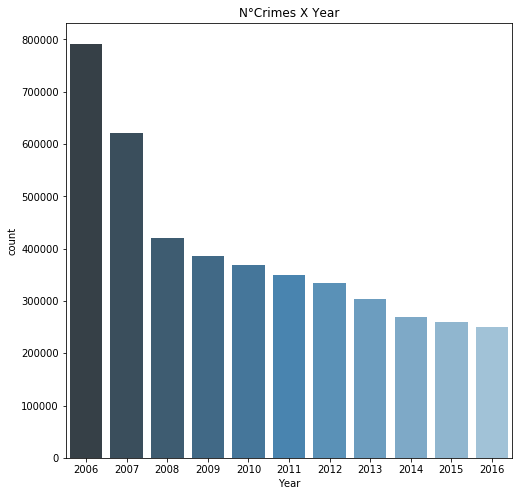

In [66]:
#andamento dei crimini per anno 
plt.figure(figsize=(8,8))
plt.title("N°Crimes X Year")
ax = sns.countplot(Chicago_06_16["Year"], palette="Blues_d" ) 

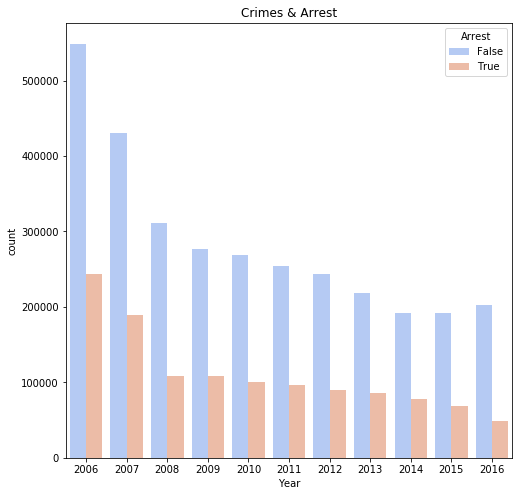

In [67]:
#rispetto al totale dei crimini per anno, in quanti casi c'è stato un arresto?
plt.figure(figsize=(8,8))
plt.title("Crimes & Arrest")

ax = sns.countplot(Chicago_06_16['Year'],hue=Chicago_06_16['Arrest'], palette='coolwarm')


Rispetto al numero di crimini commessi all'anno, la percentuale di arresti è diminuita o aumentata? 

In [68]:
Arresti = pd.DataFrame(Chicago_06_16.loc[Chicago_06_16.Arrest == True].groupby('Year').Arrest.count().rename('N° di arresti'))
Arresti['N°Crimini Totali'] =Chicago_06_16.groupby('Year').Year.count()
Arresti['% di Arresti']=round(Arresti['N° di arresti']/Arresti['N°Crimini Totali']*100,2)
Arresti

,N° di arresti,N°Crimini Totali,% di Arresti
Year,,,
2006,242970,791958,30.68
2007,189932,620304,30.62
2008,108085,419787,25.75
2009,108764,385830,28.19
2010,100080,368410,27.17
2011,96058,350472,27.41
2012,90440,334397,27.05
2013,86042,304267,28.28
2014,78038,269329,28.97


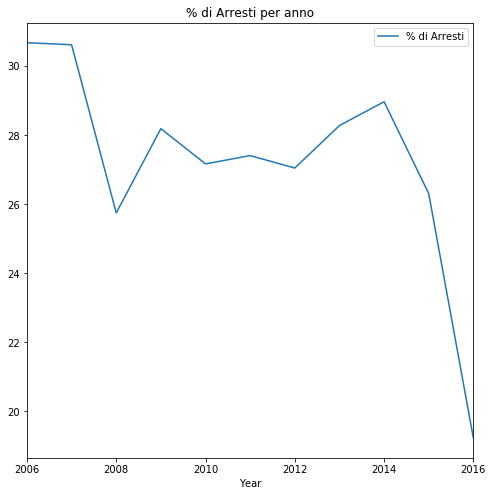

In [69]:
Arresti.plot(y='% di Arresti',figsize=(8,8) )
plt.title("% di Arresti per anno")
plt.show()

Si riscontra una diminuzione del numero di arresti rispetto al numero di crimini commessi, particolarmente significativa nel 2016.

Ma che tipologia di crimine viene commessa maggiormente? Analizziamo il Primary Type 

In [70]:
Chicago_06_16.Primary_Type.unique()

array(['THEFT', 'OTHER OFFENSE', 'ROBBERY', 'OFFENSE INVOLVING CHILDREN',
       'BATTERY', 'CRIM SEXUAL ASSAULT', 'WEAPONS VIOLATION',
       'CRIMINAL DAMAGE', 'MOTOR VEHICLE THEFT', 'DECEPTIVE PRACTICE',
       'SEX OFFENSE', 'PROSTITUTION', 'ASSAULT', 'CRIMINAL TRESPASS',
       'BURGLARY', 'KIDNAPPING', 'NARCOTICS', 'PUBLIC PEACE VIOLATION',
       'LIQUOR LAW VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'OBSCENITY', 'HOMICIDE', 'GAMBLING', 'INTIMIDATION', 'ARSON',
       'STALKING', 'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY',
       'RITUALISM', 'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'NON - CRIMINAL', 'CONCEALED CARRY LICENSE VIOLATION',
       'HUMAN TRAFFICKING'], dtype=object)

Mi accorgo che 'NON - CRIMINAL' e 'NON-CRIMINAL' sono la stessa identica cosa. Utilizzo la funzione replace per pulire il dato e verifico se la modifica è andata a buon fine.

In [71]:
#inserire funzione replace per i non- criminal che mi elimina lo spazio 
Chicago_06_16.Primary_Type=[c.replace( 'NON - CRIMINAL', 'NON-CRIMINAL') for c in Chicago_06_16.Primary_Type]
Chicago_06_16.Primary_Type.unique()

array(['THEFT', 'OTHER OFFENSE', 'ROBBERY', 'OFFENSE INVOLVING CHILDREN',
       'BATTERY', 'CRIM SEXUAL ASSAULT', 'WEAPONS VIOLATION',
       'CRIMINAL DAMAGE', 'MOTOR VEHICLE THEFT', 'DECEPTIVE PRACTICE',
       'SEX OFFENSE', 'PROSTITUTION', 'ASSAULT', 'CRIMINAL TRESPASS',
       'BURGLARY', 'KIDNAPPING', 'NARCOTICS', 'PUBLIC PEACE VIOLATION',
       'LIQUOR LAW VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'OBSCENITY', 'HOMICIDE', 'GAMBLING', 'INTIMIDATION', 'ARSON',
       'STALKING', 'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY',
       'RITUALISM', 'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'CONCEALED CARRY LICENSE VIOLATION', 'HUMAN TRAFFICKING'], dtype=object)

In [72]:
#tipologia di crimini 
crime_count = pd.DataFrame(Chicago_06_16.groupby('Primary_Type').size().sort_values(ascending=False).rename('Count').reset_index())
crime_count

,Primary_Type,Count
0,THEFT,908294
1,BATTERY,784795
2,CRIMINAL DAMAGE,506455
3,NARCOTICS,481778
4,BURGLARY,264877
5,OTHER OFFENSE,264835
6,ASSAULT,262739
7,MOTOR VEHICLE THEFT,196484
8,ROBBERY,166505
9,DECEPTIVE PRACTICE,162197


Rappresento graficamente i primi 10 crimini più commessi.

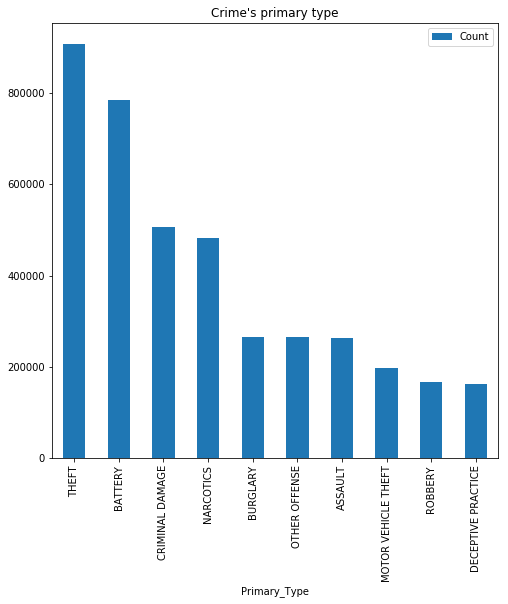

In [73]:
#top 10 tipologia di crimini 
crime_count[:10].plot(x='Primary_Type',y='Count',kind='bar', figsize=(8,8) )
plt.title("Crime's primary type")
plt.show()

Per quant riguarda i primi 5 maggiori crimini commessi, come si è evoluta negli anni ? 

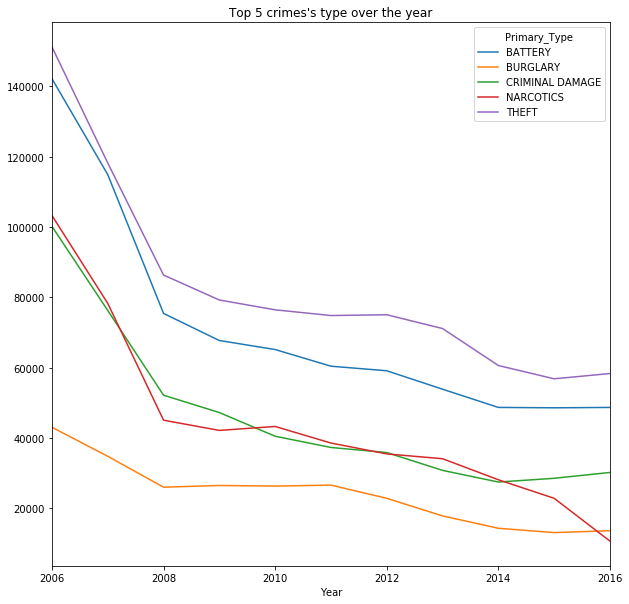

In [74]:
crimes_type = Chicago_06_16.loc[Chicago_06_16.Primary_Type.isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'BURGLARY'])]
crimes_type=crimes_type.groupby(['Year', 'Primary_Type'])
crimes_type=crimes_type['Primary_Type'].count().unstack()
crimes_type.plot(figsize=(10,10))
plt.title("Top 5 crimes's type over the year")
plt.show()

In [75]:
#calcoliamo anche il numero di arresti per il top 10 crimini.

In [76]:
Arresti2 = pd.DataFrame(Chicago_06_16.loc[Chicago_06_16.Arrest == True].groupby('Primary_Type').Arrest.count())

In [77]:
Arresti2

,Arrest
Primary_Type,
ARSON,813
ASSAULT,62852
BATTERY,181337
BURGLARY,14935
CONCEALED CARRY LICENSE VIOLATION,72
CRIM SEXUAL ASSAULT,2321
CRIMINAL DAMAGE,34933
CRIMINAL TRESPASS,88341
DECEPTIVE PRACTICE,26878


In [83]:
LD_Chicago_06_16= Chicago_06_16.groupby('Location_Description').Location_Description.count().sort_values(ascending=False).rename('Count').reset_index()
LD_Chicago_06_16

,Location_Description,Count
0,STREET,1089832
1,RESIDENCE,708018
2,SIDEWALK,493785
3,APARTMENT,490664
4,OTHER,156248
5,PARKING LOT/GARAGE(NON.RESID.),120378
6,ALLEY,99581
7,"SCHOOL, PUBLIC, BUILDING",91017
8,RESIDENCE-GARAGE,86021
9,VEHICLE NON-COMMERCIAL,77832


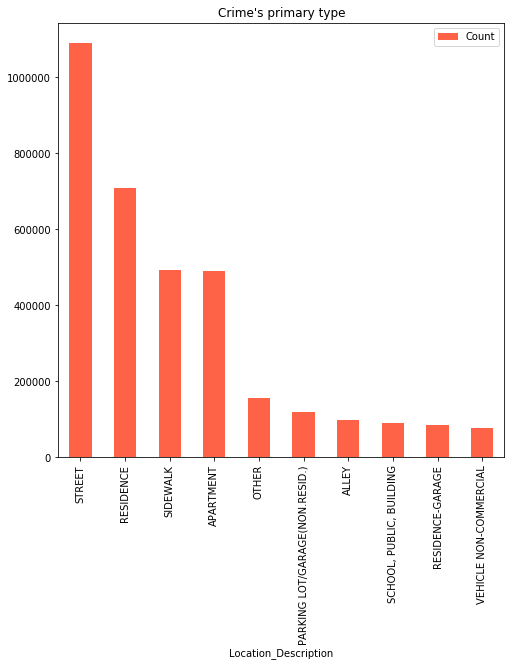

In [114]:
LD_Chicago_06_16[:10].plot(x='Location_Description',y='Count',kind='bar', color = 'tomato',figsize=(8,8) )
plt.title("Crime's primary type")
plt.show()

In [ ]:
#creo pivot table con le statistiche principali 
Chicago_06_16.groupby('Primary_Type')['Year'].mean()

Chicago_06_16.groupby(
    ['Primary_Type','Location_Description']
).agg(
    {
        'Primary_Type': [count, 'mean'],
        #'price': "mean",
       # 'calculated_host_listings_count' : [sum,'count','mean']
    }
)

<a id='ml'></a>
### Machine Learning 

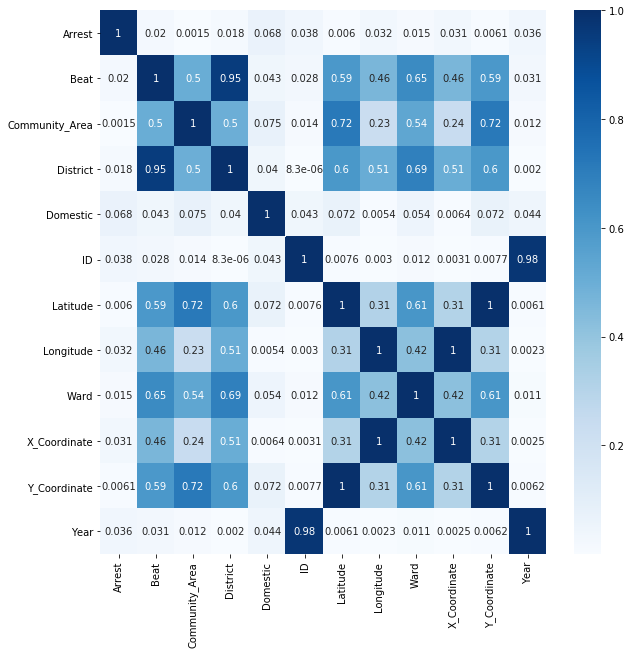

In [182]:
#Using Pearson Correlation calcolo correlazione tra variabili, utili per ml 
plt.figure(figsize=(10,10))
cor = abs(Chicago_06_16.corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [ ]:
#posso eliminare o latitudine o x cordinate ? VALUTA
